In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("submission_example.csv")

train.shape, test.shape, sub.shape

((800, 22), (200, 21), (200, 2))

In [41]:
sel = ['sum', 'term', 'credits', 'age', 'residence_since', 'dependents']#, 'immigrant_num', 'savings_amt'
#sel = ['sum', 'term', 'age']
all_X = train[sel]
all_y = train['bankruptcy']

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,random_state=77, test_size = 0.3) # test_size=0.3

In [45]:
model = DecisionTreeClassifier(max_depth = 3, random_state=77) # max_depth=5, 
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print("의사결정트리의 정확도(train) : ", score_train )
print("의사결정트리의 정확도(test) : ", score_test )

pred  = model.predict_proba(test[sel])
pred[:,1]
sub['proba'] = pred[:,1]
sub.to_csv("submit_predict_proba.csv", index=False)

의사결정트리의 정확도(train) :  0.725
의사결정트리의 정확도(test) :  0.7083333333333334


<AxesSubplot:>

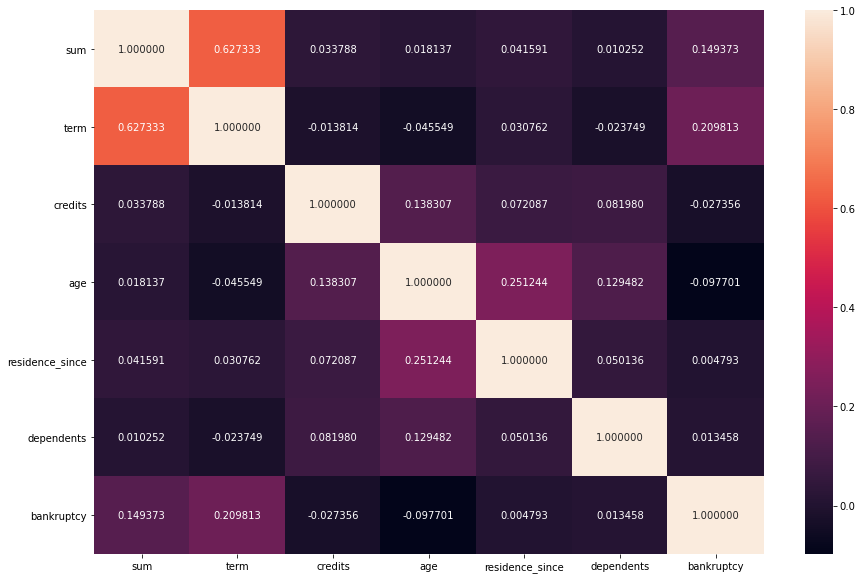

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(train[['sum', 'term', 'credits', 'age', 'residence_since', 'dependents','bankruptcy']].corr(), annot=True, fmt='.6f')

In [44]:
train

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,...,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,...,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
1,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,...,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
2,2,2096,12,2,none,education,1,none,critical account or other credits existing(not...,male single,...,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
3,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,...,skilled employee,yes,4,for free,building society savings agreement or life ins...,less-than 100 cu,2,none,less-than 0 cu,0
4,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,...,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,2301,9,2,none,furniture or equipment,1,none,existing credits paid back duly till now,female divorced or separated or married,...,skilled employee,yes,4,rent,building society savings agreement or life ins...,100 to 500 cu,1,none,no checking account,0
796,796,7511,18,1,none,used car,1,none,existing credits paid back duly till now,male single,...,skilled employee,yes,4,for free,building society savings agreement or life ins...,unknown or no savings account,2,yes,less-than 0 cu,1
797,797,1258,12,2,none,furniture or equipment,2,none,critical account or other credits existing(not...,female divorced or separated or married,...,unskilled resident,yes,4,rent,building society savings agreement or life ins...,less-than 100 cu,1,none,no checking account,0
798,798,717,24,4,none,new car,2,none,delay in paying off in the past,male married or widowed,...,skilled employee,yes,4,own,car or other,unknown or no savings account,1,yes,no checking account,0


In [47]:
test

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,...,employment,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status
0,800,1597,24,4,none,education,2,none,critical account or other credits existing(not...,male single,...,7+ y.,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,no checking account
1,801,1795,18,3,guarantor,television or radio,2,bank,critical account or other credits existing(not...,female divorced or separated or married,...,7+ y.,unskilled resident,yes,4,rent,real estate,less-than 100 cu,1,yes,0 to 200 cu
2,802,4272,20,1,none,furniture or equipment,2,none,critical account or other credits existing(not...,female divorced or separated or married,...,7+ y.,skilled employee,yes,4,own,building society savings agreement or life ins...,less-than 100 cu,1,none,less-than 0 cu
3,803,976,12,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,...,7+ y.,skilled employee,yes,4,own,car or other,unknown or no savings account,1,none,no checking account
4,804,7472,12,1,none,new car,1,none,existing credits paid back duly till now,female divorced or separated or married,...,unemployed,unemployed or unskilled non-resident,yes,2,rent,real estate,unknown or no savings account,1,none,0 to 200 cu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,995,1736,12,3,none,furniture or equipment,1,none,existing credits paid back duly till now,female divorced or separated or married,...,4 to 7 y.,unskilled resident,yes,4,own,real estate,less-than 100 cu,1,none,no checking account
196,996,3857,30,4,none,used car,1,none,existing credits paid back duly till now,male divorced or separated,...,1 to 4 y.,management or self-employed or highly qualifie...,yes,4,own,building society savings agreement or life ins...,less-than 100 cu,1,yes,less-than 0 cu
197,997,804,12,4,none,television or radio,1,none,existing credits paid back duly till now,male single,...,7+ y.,skilled employee,yes,4,own,car or other,less-than 100 cu,1,none,no checking account
198,998,1845,45,4,none,television or radio,1,none,existing credits paid back duly till now,male single,...,1 to 4 y.,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,1,yes,less-than 0 cu
